# Lab 9- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [7]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
X_Train_raw = np.array(Train_Sample[RawNames[1:]])
X_Train_feat = np.array(Train_Sample[FeatureNames[1:]])

y_Train=np.array(Train_Sample["signal"])

X_Test =np.array(Test_Sample[VarNames[1:]])
X_Test_raw =np.array(Test_Sample[RawNames[1:]])
X_Test_feat =np.array(Test_Sample[FeatureNames[1:]])

y_Test=np.array(Test_Sample["signal"])


## Exercise 1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [8]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## Exercise 2

Following the original paper (see lab 7), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

/home/millycodes/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step


/home/millycodes/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step


/home/millycodes/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step 


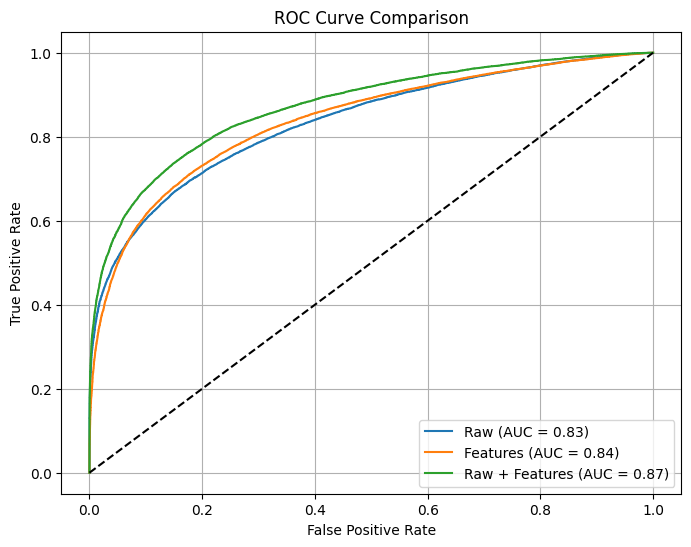

In [11]:
from tensorflow import keras
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def build_simple_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, X_test, y_train, y_test, label):
    model = build_simple_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    y_pred_probs = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    auc_score = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    return auc_score


plt.figure(figsize=(8, 6))
auc_raw = train_and_evaluate(X_Train_raw, X_Test_raw, y_Train, y_Test, 'Raw')
auc_feat = train_and_evaluate(X_Train_feat, X_Test_feat, y_Train, y_Test, 'Features')
auc_comb = train_and_evaluate(X_Train, X_Test, y_Train, y_Test, 'Raw + Features')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

## Exercise 4

Repeat exercise 4 from Lab 8, adding your best performing DNN as one of the models.  
